## EDA for Crimes-2024
Group members: Madison Mok, Miki Shimbashi, Katherine Xu

Data provided by the Chicago Police Department from Chicago Data Portal

### Introduction
This Exploratory Data Analysis (EDA) provides crime insights tailored for police officers and residents to enhance public safety and decision-making. For Chicago residents, it highlights high-risk areas, crime seasonality, and crime types to inform personal safety decisions. By leveraging Python and data visualization, this analysis aims to uncover meaningful patterns, supporting proactive policing and community awareness.

### Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
from sodapy import Socrata
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
from IPython.display import display
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofchicago.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofchicago.org,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 5000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("dqcy-ctma", limit=257000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [3]:
crimes2024 = results_df

In [4]:
crimes2024.head()

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,13709672,JJ101940,2024-12-31T23:58:00.000,014XX E 68TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,5,43,14,1186817,1860189,2024,2025-01-08T15:42:09.000,41.771470188,-87.59074212,"{'type': 'Point', 'coordinates': [-87.59074212..."
1,13707925,JJ100089,2024-12-31T23:56:00.000,047XX S DR MARTIN LUTHER KING JR DR,1365,CRIMINAL TRESPASS,TO RESIDENCE,APARTMENT,True,True,...,3,38,26,1179661,1873623,2024,2025-01-08T15:42:09.000,41.808500903,-87.616562762,"{'type': 'Point', 'coordinates': [-87.61656276..."
2,13708038,JJ100035,2024-12-31T23:55:00.000,077XX S CICERO AVE,0498,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",HOTEL / MOTEL,False,True,...,18,70,04B,1145740,1853048,2024,2025-01-08T15:42:09.000,41.752748627,-87.741497836,"{'type': 'Point', 'coordinates': [-87.74149783..."
3,13709164,JJ101392,2024-12-31T23:53:00.000,066XX S GREENWOOD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,20,42,14,1184362,1861188,2024,2025-01-08T15:42:09.000,41.774269351,-87.599709962,"{'type': 'Point', 'coordinates': [-87.59970996..."
4,13707823,JJ100020,2024-12-31T23:50:00.000,012XX N MENARD AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,29,25,08B,1137458,1907694,2024,2025-01-08T15:42:09.000,41.902858242,-87.770536741,"{'type': 'Point', 'coordinates': [-87.77053674..."


In [5]:
crimes2024.sample(3)

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
226716,13371567,JH155591,2024-02-17T09:50:00.000,076XX S GREEN ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,17,71,14,1171960,1854218,2024,2024-12-21T15:40:46.000,41.755424135,-87.645377577,"{'type': 'Point', 'coordinates': [-87.64537757..."
79088,13589457,JH418952,2024-09-07T06:00:00.000,009XX W MONTANA ST,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,43,7,06,1169563,1916493,2024,2024-12-21T15:40:46.000,41.926364659,-87.652352466,"{'type': 'Point', 'coordinates': [-87.65235246..."
72733,13605749,JH438449,2024-09-15T14:35:00.000,013XX S CANAL ST,0820,THEFT,$500 AND UNDER,SIDEWALK,False,False,...,28,28,06,1173336,1893976,2024,2024-12-21T15:40:46.000,41.864493678,-87.639158,"{'type': 'Point', 'coordinates': [-87.639158, ..."


In [6]:
crimes2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257000 entries, 0 to 256999
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    257000 non-null  object
 1   case_number           257000 non-null  object
 2   date                  257000 non-null  object
 3   block                 257000 non-null  object
 4   iucr                  257000 non-null  object
 5   primary_type          257000 non-null  object
 6   description           257000 non-null  object
 7   location_description  255999 non-null  object
 8   arrest                257000 non-null  bool  
 9   domestic              257000 non-null  bool  
 10  beat                  257000 non-null  object
 11  district              257000 non-null  object
 12  ward                  257000 non-null  object
 13  community_area        256998 non-null  object
 14  fbi_code              257000 non-null  object
 15  x_coordinate     

In [7]:
crimes2024.columns

Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location'],
      dtype='object')

In [8]:
crimes2024.isna().head()

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
crimes2024.isna().sum()

id                         0
case_number                0
date                       0
block                      0
iucr                       0
primary_type               0
description                0
location_description    1001
arrest                     0
domestic                   0
beat                       0
district                   0
ward                       0
community_area             2
fbi_code                   0
x_coordinate              77
y_coordinate              77
year                       0
updated_on                 0
latitude                  77
longitude                 77
location                  77
dtype: int64

In [10]:
crimes2024.shape

(257000, 22)

In [11]:
crimes2024.dropna(subset=['location_description']).head()

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,13709672,JJ101940,2024-12-31T23:58:00.000,014XX E 68TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,5,43,14,1186817,1860189,2024,2025-01-08T15:42:09.000,41.771470188,-87.59074212,"{'type': 'Point', 'coordinates': [-87.59074212..."
1,13707925,JJ100089,2024-12-31T23:56:00.000,047XX S DR MARTIN LUTHER KING JR DR,1365,CRIMINAL TRESPASS,TO RESIDENCE,APARTMENT,True,True,...,3,38,26,1179661,1873623,2024,2025-01-08T15:42:09.000,41.808500903,-87.616562762,"{'type': 'Point', 'coordinates': [-87.61656276..."
2,13708038,JJ100035,2024-12-31T23:55:00.000,077XX S CICERO AVE,0498,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",HOTEL / MOTEL,False,True,...,18,70,04B,1145740,1853048,2024,2025-01-08T15:42:09.000,41.752748627,-87.741497836,"{'type': 'Point', 'coordinates': [-87.74149783..."
3,13709164,JJ101392,2024-12-31T23:53:00.000,066XX S GREENWOOD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,20,42,14,1184362,1861188,2024,2025-01-08T15:42:09.000,41.774269351,-87.599709962,"{'type': 'Point', 'coordinates': [-87.59970996..."
4,13707823,JJ100020,2024-12-31T23:50:00.000,012XX N MENARD AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,29,25,08B,1137458,1907694,2024,2025-01-08T15:42:09.000,41.902858242,-87.770536741,"{'type': 'Point', 'coordinates': [-87.77053674..."


In [12]:
crimes2024 = crimes2024.drop(['x_coordinate', 'y_coordinate','location'], axis=1, errors='ignore')

In [13]:
crimes2024.columns

Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'year', 'updated_on',
       'latitude', 'longitude'],
      dtype='object')

In [14]:
crimes2024 = crimes2024.dropna(subset=['location_description','latitude','longitude'])

In [15]:
crimes2024.shape

(255927, 19)

In [16]:
# Convert 'date' column to datetime objects
crimes2024['date'] = pd.to_datetime(crimes2024['date'])

# Extract date and time components
crimes2024['date_only'] = crimes2024['date'].dt.date
crimes2024['time_only'] = crimes2024['date'].dt.time
crimes2024['month'] = crimes2024['date'].dt.month

# Drop original 'date' column
crimes2024 = crimes2024.drop('date', axis=1)

crimes2024.head()

,id,case_number,block,iucr,primary_type,description,location_description,arrest,domestic,beat,...,ward,community_area,fbi_code,year,updated_on,latitude,longitude,date_only,time_only,month
0,13709672,JJ101940,014XX E 68TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,0332,...,5,43,14,2024,2025-01-08T15:42:09.000,41.771470188,-87.59074212,2024-12-31,23:58:00,12
1,13707925,JJ100089,047XX S DR MARTIN LUTHER KING JR DR,1365,CRIMINAL TRESPASS,TO RESIDENCE,APARTMENT,True,True,0223,...,3,38,26,2024,2025-01-08T15:42:09.000,41.808500903,-87.616562762,2024-12-31,23:56:00,12
2,13708038,JJ100035,077XX S CICERO AVE,0498,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",HOTEL / MOTEL,False,True,0834,...,18,70,04B,2024,2025-01-08T15:42:09.000,41.752748627,-87.741497836,2024-12-31,23:55:00,12
3,13709164,JJ101392,066XX S GREENWOOD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,0321,...,20,42,14,2024,2025-01-08T15:42:09.000,41.774269351,-87.599709962,2024-12-31,23:53:00,12
4,13707823,JJ100020,012XX N MENARD AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,False,2531,...,29,25,08B,2024,2025-01-08T15:42:09.000,41.902858242,-87.770536741,2024-12-31,23:50:00,12


In [17]:
# Group by 'community_area' and calculate the average 'arrest' rate.
arrest_rate_by_community = crimes2024.groupby('community_area')['arrest'].mean()
arrest_rate_by_community

community_area
1     0.150829
10    0.065113
11    0.118677
12    0.059846
13    0.086324
        ...   
75    0.140475
76    0.166865
77    0.111679
8     0.157801
9     0.059701
Name: arrest, Length: 77, dtype: float64

In [18]:
# Group by 'location_description' and count the number of crimes.
crime_count_by_location = crimes2024.groupby('location_description')['id'].count()
crime_count_by_location

location_description
ABANDONED BUILDING                                        150
AIRCRAFT                                                   56
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA           103
AIRPORT BUILDING NON-TERMINAL - SECURE AREA                57
AIRPORT EXTERIOR - NON-SECURE AREA                        103
                                                         ... 
VEHICLE - DELIVERY TRUCK                                   47
VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)     124
VEHICLE NON-COMMERCIAL                                   3636
WAREHOUSE                                                 213
YARD                                                       14
Name: id, Length: 128, dtype: int64

In [19]:
# Group by 'month' and count the number of crimes.
crime_count_by_month = crimes2024.groupby(pd.to_datetime(crimes2024['date_only']).dt.month)['id'].count()
crime_count_by_month

date_only
1     18842
2     19772
3     20773
4     20319
5     22812
6     22991
7     23914
8     22752
9     22746
10    22234
11    19491
12    19281
Name: id, dtype: int64

In [20]:
# Group by 'hour' and calculate the average 'domestic' value.
domestic_by_hour = crimes2024.groupby(crimes2024['time_only'].apply(lambda x: x.hour))['domestic'].count()
domestic_by_hour

time_only
0     17048
1      8552
2      7792
3      6633
4      5508
5      4721
6      4893
7      6422
8      8841
9     10374
10    10847
11    11206
12    14668
13    11538
14    12140
15    13806
16    13754
17    13926
18    13644
19    13326
20    12814
21    11913
22    11381
23    10180
Name: domestic, dtype: int64

In [21]:
numerical_stats = crimes2024[['beat', 'ward', 'district']].describe()
numerical_stats

,beat,ward,district
count,255927,255927,255927
unique,275,50,23
top,1834,27,008
freq,3059,11885,17112


In [22]:
crimes2024['month'].value_counts()

month
7     23914
6     22991
5     22812
8     22752
9     22746
10    22234
3     20773
4     20319
2     19772
11    19491
12    19281
1     18842
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Crimes by Month')

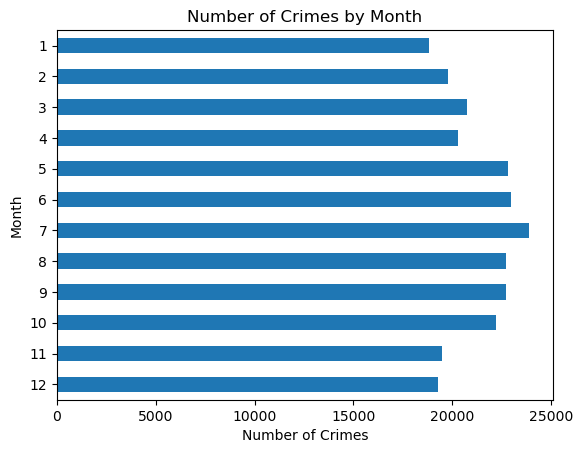

In [23]:
crimes2024['month'].value_counts().sort_index(ascending = False).plot(kind='barh', legend=False)

plt.xlabel("Number of Crimes")
plt.ylabel("Month")
plt.title("Number of Crimes by Month")

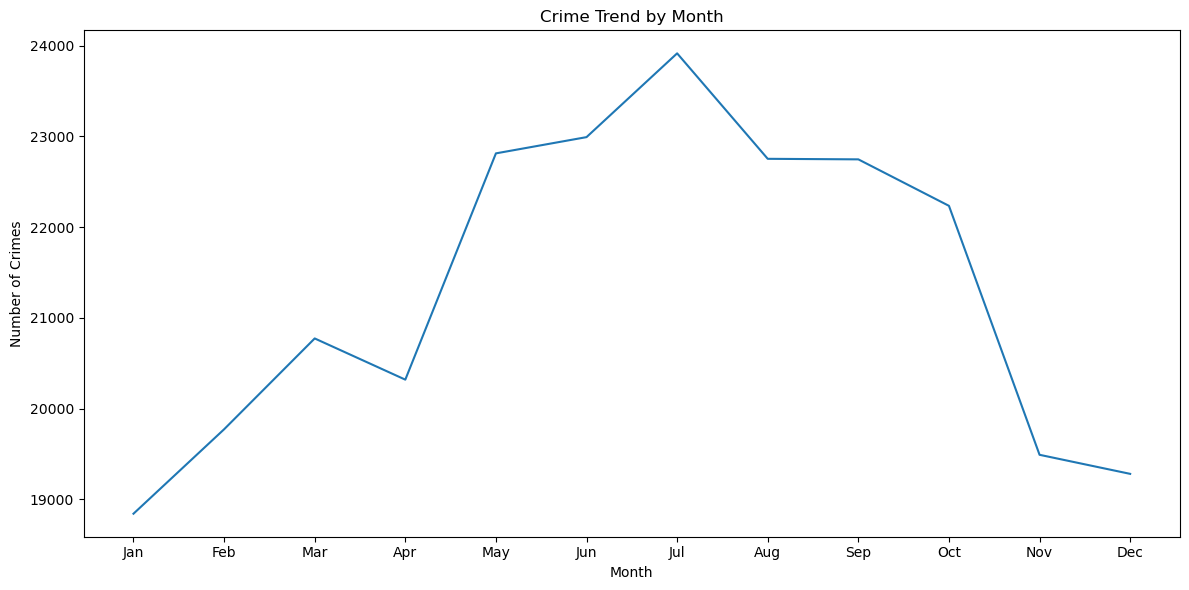

In [24]:
# Group by month and count crimes
monthly_crime_counts = crimes2024.groupby('month')['id'].count().reset_index()

# Create the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='id', data=monthly_crime_counts)
plt.title('Crime Trend by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set x-axis labels
plt.tight_layout()
plt.show()

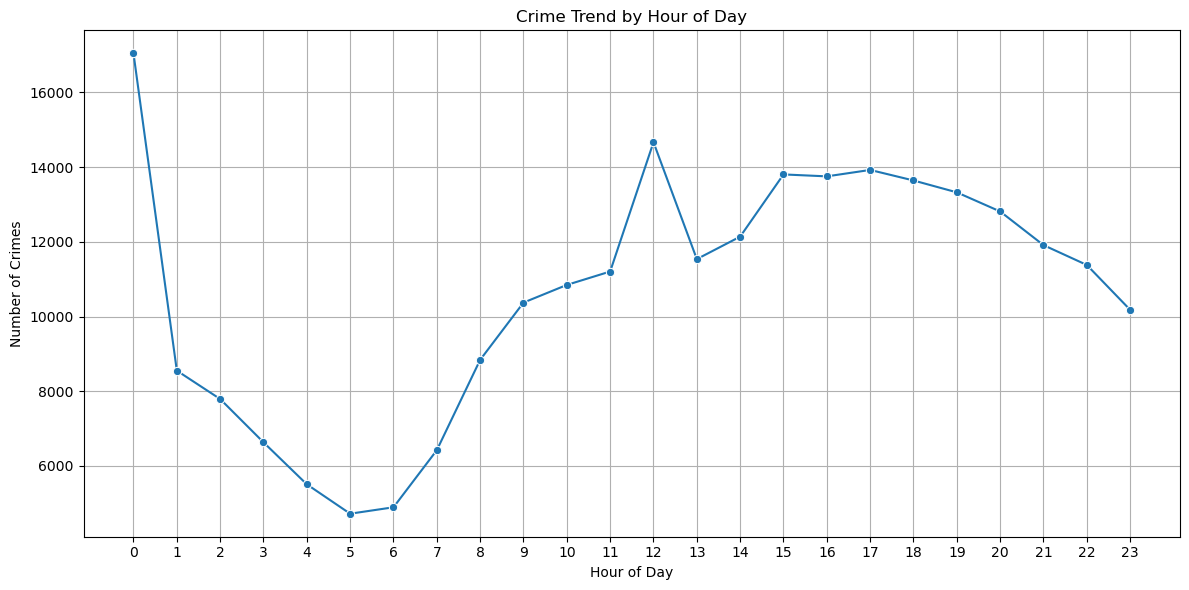

In [25]:
# Convert 'time_only' to datetime format
crimes2024['time_only'] = pd.to_datetime(crimes2024['time_only'], format='%H:%M:%S')

# Extract only the hour (0-23)
crimes2024['hour'] = crimes2024['time_only'].dt.hour

# Group by hour and count crimes
hourly_crime_counts = crimes2024.groupby('hour')['id'].count().reset_index()

# Create the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='id', data=hourly_crime_counts, marker='o')

# Customize the plot
plt.title('Crime Trend by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.xticks(range(24))  # Set x-axis labels from 0 to 23
plt.grid(True)
plt.tight_layout()
plt.show()

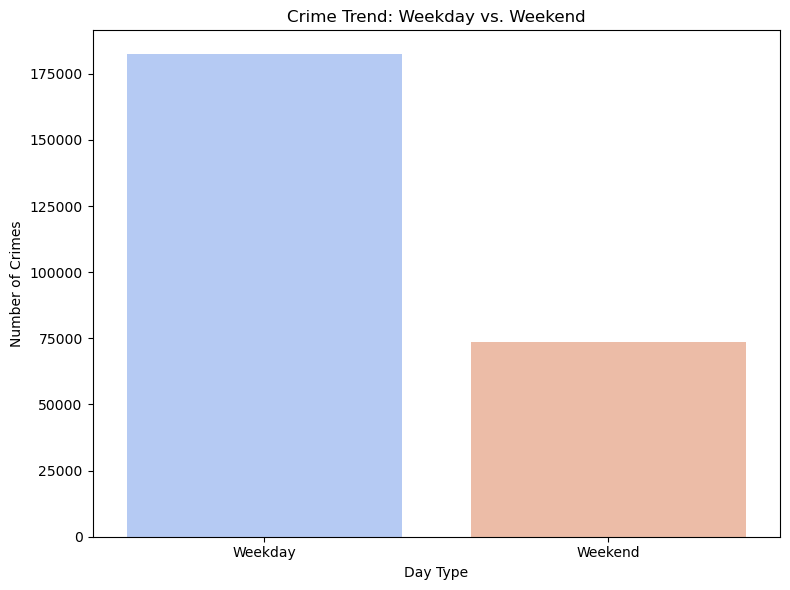

In [26]:
# Ensure 'date_only' is in datetime format
crimes2024['date_only'] = pd.to_datetime(crimes2024['date_only'], errors='coerce')

# Check if 'date_only' contains NaT values (indicating conversion issues)
if crimes2024['date_only'].isna().sum() > 0:
    print("Warning: Some date values could not be converted!")

# Extract day of the week (0=Monday, 6=Sunday)
crimes2024['dayofweek'] = crimes2024['date_only'].dt.dayofweek

# Categorize as weekday or weekend
crimes2024['weekday_weekend'] = crimes2024['dayofweek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Group by weekday/weekend and count crimes
weekday_weekend_crime_counts = crimes2024.groupby('weekday_weekend')['id'].count().reset_index()

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='weekday_weekend', y='id', data=weekday_weekend_crime_counts, palette="coolwarm")

# Customize the plot
plt.title('Crime Trend: Weekday vs. Weekend')
plt.xlabel('Day Type')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

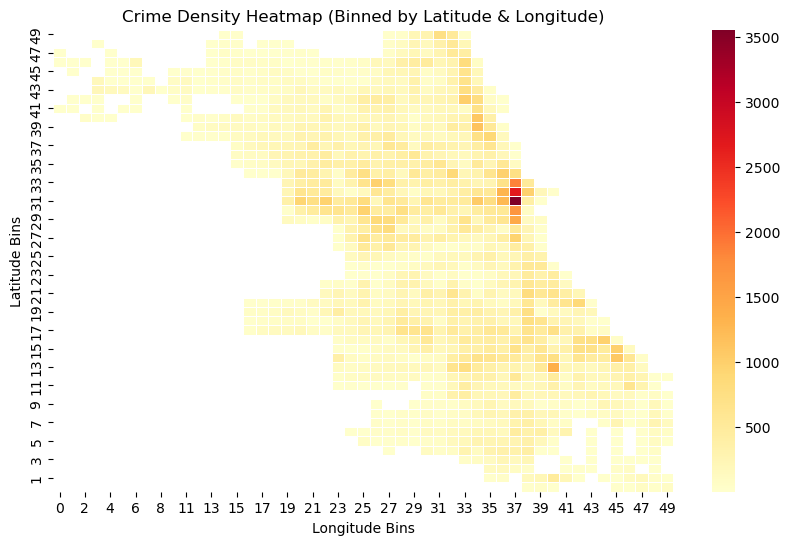

In [27]:
# Convert latitude and longitude to float
crimes2024["longitude"] = pd.to_numeric(crimes2024["longitude"], errors="coerce")
crimes2024["latitude"] = pd.to_numeric(crimes2024["latitude"], errors="coerce")

# Drop rows where conversion resulted in NaN
crimes2024 = crimes2024.dropna(subset=["longitude", "latitude"])

# Define the grid for the heatmap (adjust bin size as needed)
x_bins = pd.cut(crimes2024["longitude"], bins=50, labels=False)
y_bins = pd.cut(crimes2024["latitude"], bins=50, labels=False)

# Group by bins and count occurrences (crime density)
crime_heatmap_data = pd.DataFrame({'x_bins': x_bins, 'y_bins': y_bins})
heatmap_counts = crime_heatmap_data.value_counts().reset_index(name='count')

# Pivot the data to create a heatmap format (flip it upside down using [::-1])
heatmap_pivot = heatmap_counts.pivot(index="y_bins", columns="x_bins", values="count")[::-1]

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_pivot, cmap="YlOrRd", linewidths=0.5)

plt.title("Crime Density Heatmap (Binned by Latitude & Longitude)")
plt.xlabel("Longitude Bins")
plt.ylabel("Latitude Bins")
plt.show()

In [28]:
# Group by 'community_area' and count crimes
community_crime_counts = crimes2024.groupby('community_area')['id'].count().reset_index()

# Rename columns
community_crime_counts.columns = ['community_area', 'crime_count']

# Sort by crime count (ascending for low crime rates)
community_crime_counts = community_crime_counts.sort_values(by=['crime_count'], ascending=True)

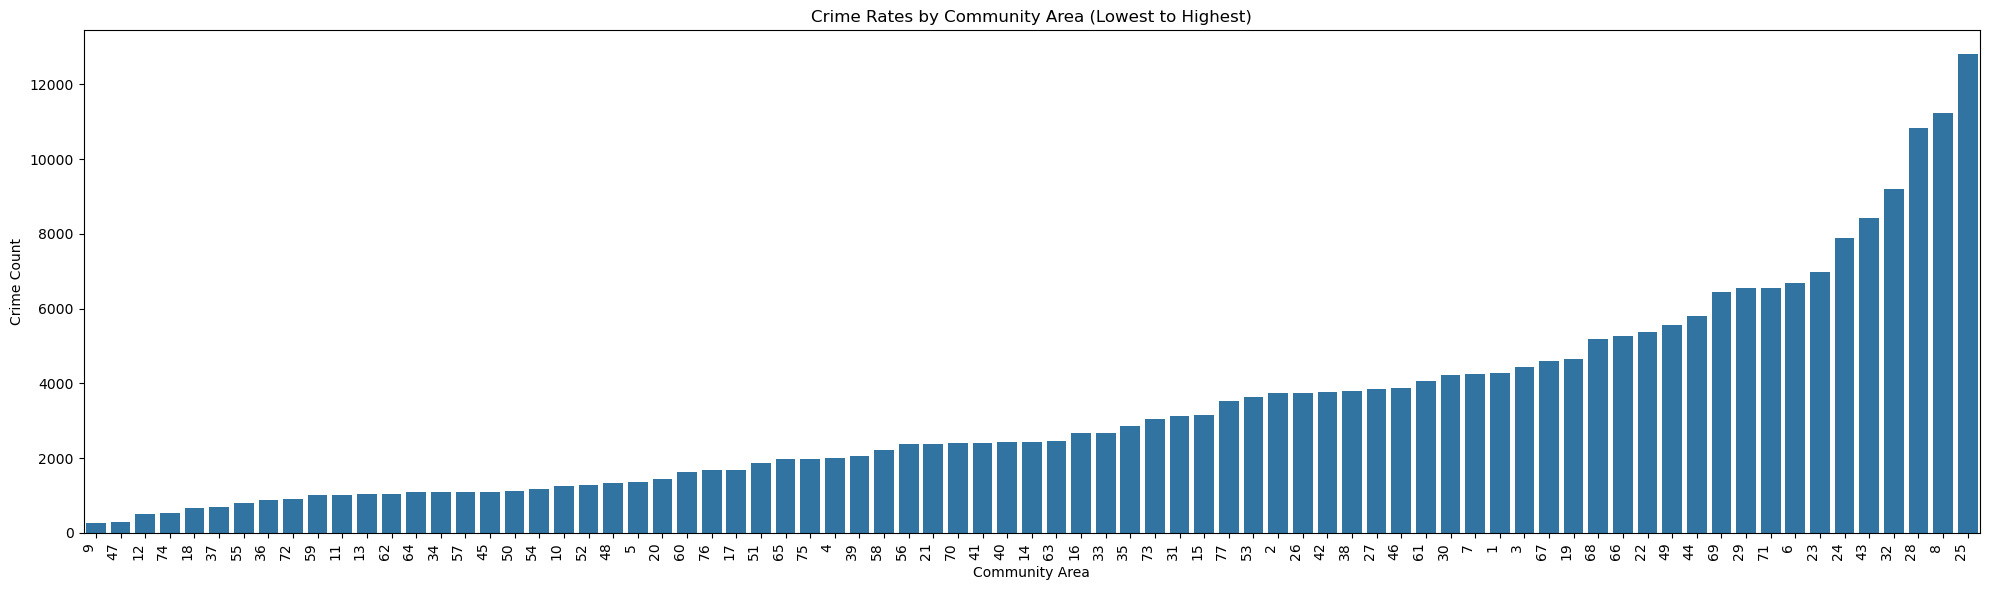

In [29]:
# Create a bar chart (figsize adjusted for better display of all areas)
plt.figure(figsize=(20, 6))
sns.barplot(x='community_area', y='crime_count', data=community_crime_counts) 
# Note: we are now using the entire community_crime_counts DataFrame

plt.title('Crime Rates by Community Area (Lowest to Highest)')
plt.xlabel('Community Area')
plt.ylabel('Crime Count')
# Rotate x-axis labels for readability
plt.xticks(rotation=90, ha='right')  
plt.tight_layout()
plt.show()

In [30]:
# Group by 'community_area' and count crimes
community_crime_counts = crimes2024.groupby('community_area')['id'].count().reset_index()

# Rename columns for clarity
community_crime_counts.columns = ['community_area', 'crime_count']

# Sort by crime count in ascending order (low crime rates first)
community_crime_counts = community_crime_counts.sort_values(by=['crime_count'], ascending=True)

# Show the top 10 lowest results
community_crime_counts.head(10)

,community_area,crime_count
76,9,268
41,47,289
3,12,518
71,74,542
9,18,662
30,37,700
50,55,799
29,36,872
69,72,896
54,59,1016


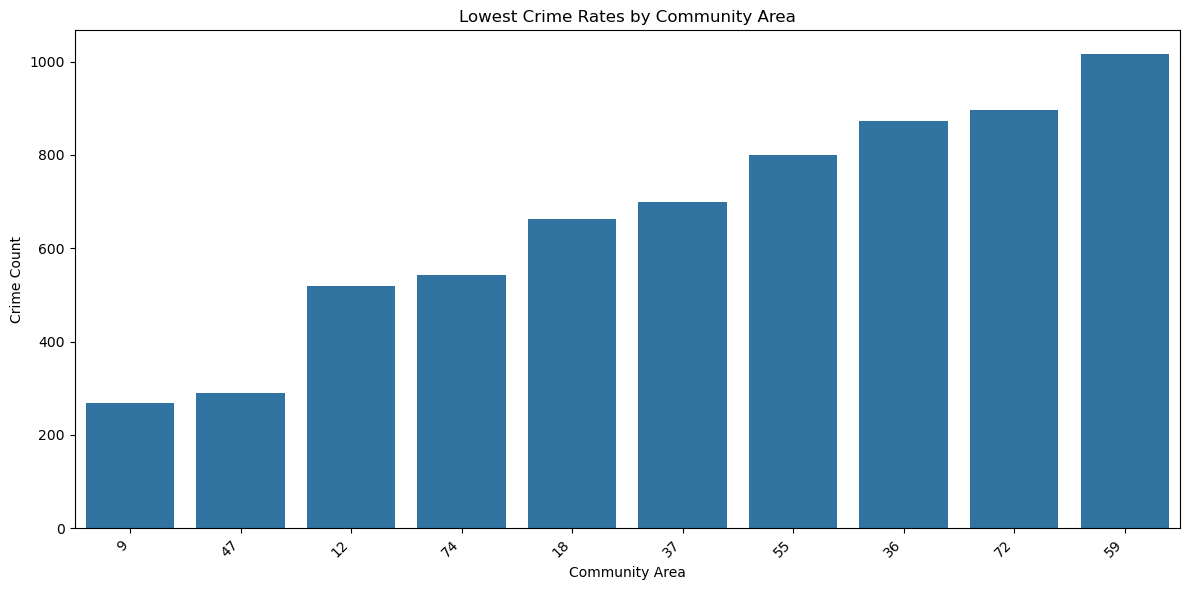

In [31]:
# Create a bar chart for 10 lowest
plt.figure(figsize=(12, 6))
sns.barplot(x='community_area', y='crime_count', data=community_crime_counts.head(10)) 
plt.title('Lowest Crime Rates by Community Area')
plt.xlabel('Community Area')
plt.ylabel('Crime Count')
# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

In [32]:
# Group by 'community_area' and count crimes
community_crime_counts = crimes2024.groupby('community_area')['id'].count().reset_index()

# Rename columns for clarity
community_crime_counts.columns = ['community_area', 'crime_count']

# Sort by crime count in descending order (highest crime rates first)
community_crime_counts = community_crime_counts.sort_values(by=['crime_count'], ascending=False)

# Display the result
community_crime_counts.head(10)  # Show top 10 highest

,community_area,crime_count
17,25,12804
75,8,11242
20,28,10823
25,32,9205
37,43,8436
16,24,7898
15,23,6992
55,6,6697
68,71,6563
21,29,6543


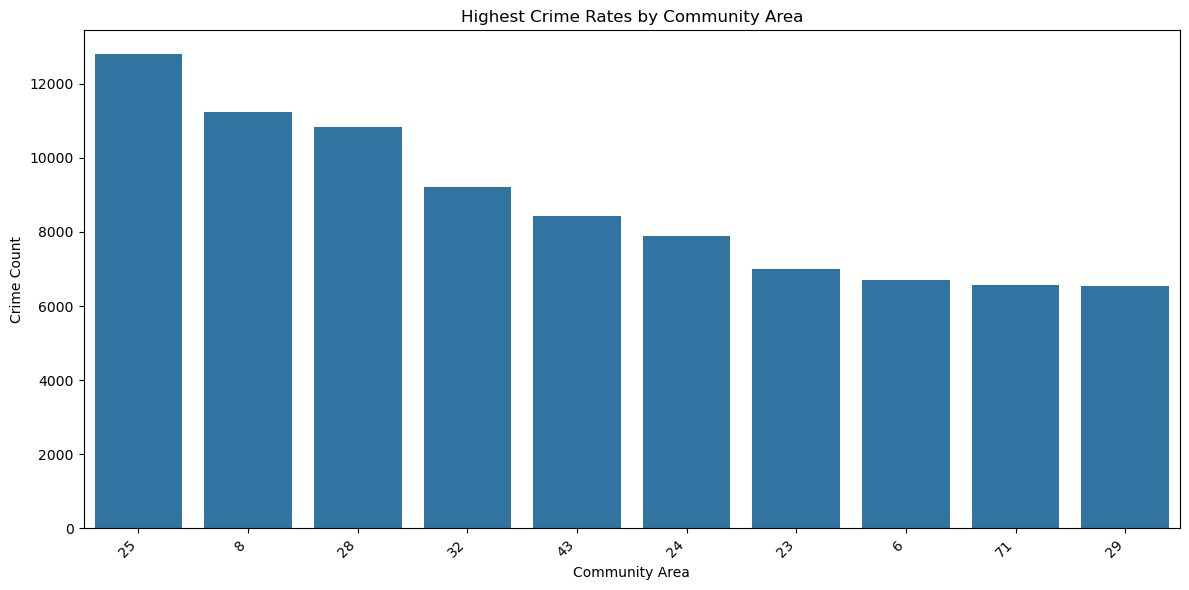

In [33]:
# Create a bar chart for 10 highest
plt.figure(figsize=(12, 6))
sns.barplot(x='community_area', y='crime_count', data=community_crime_counts.head(10)) 
plt.title('Highest Crime Rates by Community Area')
plt.xlabel('Community Area')
plt.ylabel('Crime Count')
# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

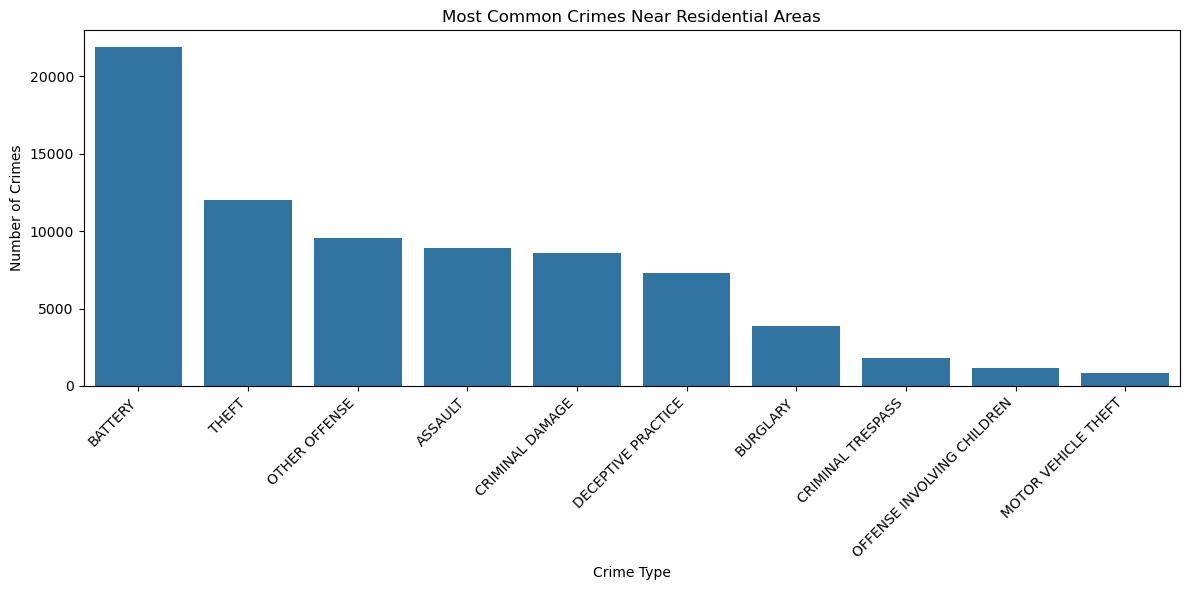

In [34]:
# Filter for crimes near residential areas
residential_crimes = crimes2024[crimes2024['location_description'].isin(["RESIDENCE", "APARTMENT", "RESIDENTIAL YARD (FRONT/BACK)"])] 

# Group by primary_type and count top 10 crimes
crime_type_counts = residential_crimes['primary_type'].value_counts().head(10).reset_index()

# Rename columns
crime_type_counts.columns = ['crime_type', 'count']

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='crime_type', y='count', data=crime_type_counts)
plt.title('Most Common Crimes Near Residential Areas')
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Additional Dataset 1: American Community Survey Data (ACS) Data by Ward
We are now including additional data: ACS 5 Year Data by Ward, provided by the City of Chicago. This dataset has various socio-economic information about different wards in Chicago, but we are interested in income levels.

In [35]:
client = Socrata("data.cityofchicago.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofchicago.org,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results_out = client.get("awnk-6fvc", limit=2000)

# Convert to pandas DataFrame
Income = pd.DataFrame.from_records(results_out)

In [36]:
Income.head()

,acs_year,ward,under_25_000,_25_000_to_49_999,_50_000_to_74_999,_75_000_to_125_000,_125_000,male_0_to_17,male_18_to_24,male_25_to_34,...,white,black_or_african_american,american_indian_or_alaska,asian,native_hawaiin_or_pacific,other_race,multiracial,white_not_hispanic_or_latino,hispanic_or_latino,record_id
0,2023,1,721.0,943.0,760.0,1721.0,6677.0,3987.0,1868.0,10455.0,...,38343.0,3570.0,173.0,3213.0,63.0,3056.0,7757.0,32404.0,14475.0,2023_1
1,2023,2,482.0,627.0,613.0,1250.0,7494.0,2980.0,2569.0,9853.0,...,44545.0,3848.0,185.0,5023.0,14.0,1233.0,3624.0,42193.0,5050.0,2023_2
2,2023,3,1820.0,1545.0,994.0,1772.0,4431.0,4877.0,2612.0,5469.0,...,14396.0,33243.0,229.0,4000.0,24.0,915.0,2638.0,13621.0,2756.0,2023_3
3,2023,4,1728.0,1288.0,950.0,1639.0,4573.0,4259.0,2387.0,5704.0,...,14306.0,28149.0,197.0,5356.0,4.0,1029.0,2897.0,13094.0,3258.0,2023_4
4,2023,5,1584.0,1359.0,1134.0,1665.0,2861.0,4587.0,3421.0,4536.0,...,11161.0,29364.0,69.0,3435.0,0.0,1096.0,2247.0,10219.0,2413.0,2023_5


In [37]:
Income.columns

Index(['acs_year', 'ward', 'under_25_000', '_25_000_to_49_999',
       '_50_000_to_74_999', '_75_000_to_125_000', '_125_000', 'male_0_to_17',
       'male_18_to_24', 'male_25_to_34', 'male_35_to_49', 'male_50_to_64',
       'male_65', 'female_0_to_17', 'female_18_to_24', 'female_25_to_34',
       'female_35_to_49', 'female_50_to_64', 'female_65', 'total_population',
       'white', 'black_or_african_american', 'american_indian_or_alaska',
       'asian', 'native_hawaiin_or_pacific', 'other_race', 'multiracial',
       'white_not_hispanic_or_latino', 'hispanic_or_latino', 'record_id'],
      dtype='object')

In [38]:
Income.isna().head()

,acs_year,ward,under_25_000,_25_000_to_49_999,_50_000_to_74_999,_75_000_to_125_000,_125_000,male_0_to_17,male_18_to_24,male_25_to_34,...,white,black_or_african_american,american_indian_or_alaska,asian,native_hawaiin_or_pacific,other_race,multiracial,white_not_hispanic_or_latino,hispanic_or_latino,record_id
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
# Connect to the City of Chicago data portal
client = Socrata("data.cityofchicago.org", None)

# Fetch first 2000 records from the dataset
results_out = client.get("awnk-6fvc", limit=2000)

# Convert to pandas DataFrame
Income = pd.DataFrame.from_records(results_out)

# Convert relevant columns to numeric to handle missing values
income_columns = ['under_25_000', '_25_000_to_49_999', '_50_000_to_74_999', 
                  '_75_000_to_125_000', '_125_000', 'ward']
for col in income_columns:
    Income[col] = pd.to_numeric(Income[col], errors='coerce')

# Define estimated midpoints for each income bracket
income_midpoints = {
    'under_25_000': 12500,
    '_25_000_to_49_999': 37500,
    '_50_000_to_74_999': 62500,
    '_75_000_to_125_000': 100000,
    '_125_000': 150000  # Approximate midpoint for highest bracket
}

# Multiply each income group by its midpoint to estimate total income per ward
for col, midpoint in income_midpoints.items():
    Income[col] = Income[col] * midpoint

# Calculate estimated total income per ward
Income['total_estimated_income'] = (
    Income['under_25_000'] +
    Income['_25_000_to_49_999'] +
    Income['_50_000_to_74_999'] +
    Income['_75_000_to_125_000'] +
    Income['_125_000']
)

# Calculate total number of households per ward (sum of all income brackets)
Income['total_households'] = (
    Income['under_25_000'] / 12500 + 
    Income['_25_000_to_49_999'] / 37500 +
    Income['_50_000_to_74_999'] / 62500 +
    Income['_75_000_to_125_000'] / 100000 +
    Income['_125_000'] / 150000
)

# Group by ward and compute mean income
ward_income = Income.groupby('ward').apply(
    lambda x: x['total_estimated_income'].sum() / x['total_households'].sum()
).reset_index(name='mean_income')


/tmp/ipykernel_79/3454472569.py:48: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ward_income = Income.groupby('ward').apply(


In [40]:
ward_income.head()

,ward,mean_income
0,1,116940.029569
1,2,125831.263138
2,3,93226.898315
3,4,96200.137552
4,5,85701.208881


In [41]:
ward_crime_counts = crimes2024.groupby('ward')['id'].count().reset_index()
ward_crime_counts.columns = ['Ward', 'Crime Count']
ward_crime_counts = ward_crime_counts.sort_index()

In [42]:
ward_crime_counts.head()

,Ward,Crime Count
0,1,4850
1,10,5257
2,11,3041
3,12,2890
4,13,2838


In [43]:
# Convert 'ward' column to numeric in both datasets
ward_income['ward'] = pd.to_numeric(ward_income['ward'], errors='coerce')
crimes2024['ward'] = pd.to_numeric(crimes2024['ward'], errors='coerce')

# Aggregate crime count by ward
ward_crime = crimes2024.groupby('ward')['id'].count().reset_index()
ward_crime.columns = ['ward', 'Crime Count']  # Rename column for clarity

# Merge datasets on 'ward'
merged_df = ward_income.merge(ward_crime, on='ward')

In [44]:
from scipy import stats

# Compute the z-score for each column
z_scores = stats.zscore(merged_df[['mean_income', 'Crime Count']])

# Define a threshold (commonly 3 standard deviations)
threshold = 3

# Filter out outliers
filtered_df = merged_df[(abs(z_scores) < threshold).all(axis=1)]

In [45]:
# Compute correlation between mean income and crime count
income_crime_correlation = filtered_df[['mean_income', 'Crime Count']].corr()

In [46]:
income_crime_correlation

,mean_income,Crime Count
mean_income,1.00000,-0.41253
Crime Count,-0.41253,1.00000


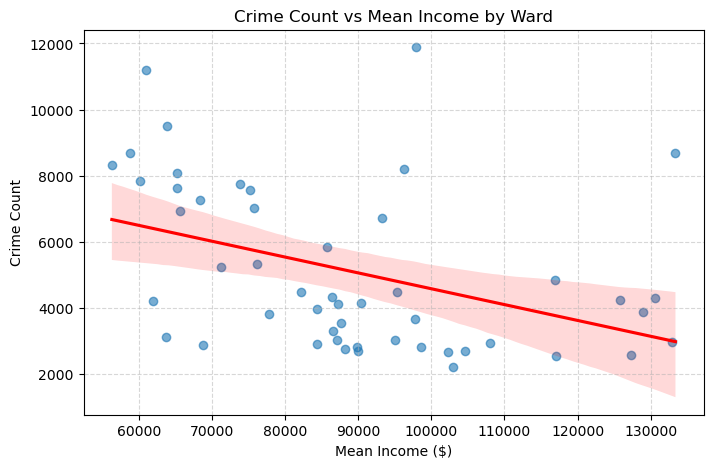

In [47]:
plt.figure(figsize=(8, 5))
sns.regplot(data=merged_df, x='mean_income', y='Crime Count', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

plt.xlabel('Mean Income ($)')
plt.ylabel('Crime Count')
plt.title('Crime Count vs Mean Income by Ward')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

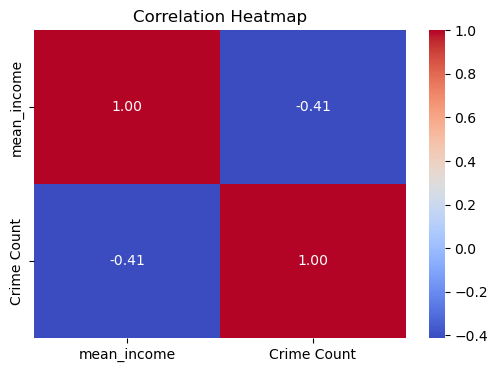

In [48]:
plt.figure(figsize=(6,4))
sns.heatmap(merged_df[['mean_income', 'Crime Count']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### Additional Dataset 2: Chicago Weather Report

We are now including a 2024 weather report of Chicago, provided by Visual Crossing Weather Data Service. This dataset has information such as average temperature, wind speed, and other weather data for each day of 2024 in Chicago.

In [49]:
cwr = pd.read_csv('Chicago Weather Report 2024.csv')

In [50]:
cwr.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,63.357377,48.220219,55.725956,61.951639,44.504918,53.147268,42.380601,63.524317,0.091902,39.344262,...,15.600546,188.886885,1015.822131,63.153279,9.316667,68.704918,5.926776,4.407104,13.333333,0.488087
std,19.769094,17.717270,18.432345,22.923420,22.101838,22.220944,17.201939,12.606336,0.227479,48.918233,...,4.439635,100.850687,7.082645,26.514026,1.374213,45.812388,3.961236,2.769868,12.323642,0.292170
min,1.800000,-9.400000,-5.700000,-21.100000,-32.300000,-28.100000,-14.100000,36.200000,0.000000,0.000000,...,7.200000,3.600000,991.400000,0.000000,1.100000,2.700000,0.100000,0.000000,10.000000,0.000000
25%,46.825000,34.700000,40.625000,42.700000,28.025000,34.725000,31.000000,54.425000,0.000000,0.000000,...,12.225000,95.450000,1010.900000,42.450000,9.500000,32.025000,2.700000,2.000000,10.000000,0.250000
50%,67.500000,49.800000,58.700000,67.500000,49.000000,58.600000,43.650000,62.100000,0.000000,0.000000,...,15.000000,209.050000,1015.500000,66.650000,9.900000,56.200000,4.900000,4.000000,10.000000,0.500000
75%,80.075000,63.300000,71.400000,79.650000,63.300000,71.375000,55.625000,73.350000,0.048000,100.000000,...,18.650000,267.300000,1020.300000,85.775000,9.900000,106.275000,9.175000,7.000000,10.000000,0.750000
max,97.400000,78.900000,87.700000,112.000000,78.900000,91.800000,71.900000,95.400000,2.248000,100.000000,...,32.500000,358.600000,1038.800000,100.000000,9.900000,198.900000,17.100000,9.000000,100.000000,0.980000


In [51]:
cwr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              366 non-null    object 
 1   datetime          366 non-null    object 
 2   tempmax           366 non-null    float64
 3   tempmin           366 non-null    float64
 4   temp              366 non-null    float64
 5   feelslikemax      366 non-null    float64
 6   feelslikemin      366 non-null    float64
 7   feelslike         366 non-null    float64
 8   dew               366 non-null    float64
 9   humidity          366 non-null    float64
 10  precip            366 non-null    float64
 11  precipprob        366 non-null    int64  
 12  precipcover       366 non-null    float64
 13  preciptype        151 non-null    object 
 14  snow              366 non-null    float64
 15  snowdepth         366 non-null    float64
 16  windgust          366 non-null    float64
 1

In [52]:
cwr.head(3)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,chicago,2024-01-01,33.4,28.3,31.6,25.6,17.1,22.6,23.2,71.1,...,1.2,1,10,2024-01-01T07:18:21,2024-01-01T16:29:50,0.69,Overcast,Cloudy skies throughout the day.,cloudy,"72534014819,KORD,KMDW,72530094846,F1983,744665..."
1,chicago,2024-01-02,39.2,27.4,32.8,30.9,16.5,23.3,25.1,73.4,...,2.4,1,10,2024-01-02T07:18:26,2024-01-02T16:30:42,0.72,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,F1983,744665..."
2,chicago,2024-01-03,36.0,31.6,34.1,30.6,25.1,27.8,26.8,74.7,...,0.7,1,10,2024-01-03T07:18:29,2024-01-03T16:31:35,0.75,Overcast,Cloudy skies throughout the day.,cloudy,"72534014819,KORD,KMDW,72530094846,F1983,744665..."


In [53]:
cwr.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [54]:
cwr.isna().head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
cwr.isna().sum()

name                  0
datetime              0
tempmax               0
tempmin               0
temp                  0
feelslikemax          0
feelslikemin          0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob            0
precipcover           0
preciptype          215
snow                  0
snowdepth             0
windgust              0
windspeed             0
winddir               0
sealevelpressure      0
cloudcover            0
visibility            0
solarradiation        0
solarenergy           0
uvindex               0
severerisk            0
sunrise               0
sunset                0
moonphase             0
conditions            0
description           0
icon                  0
stations              0
dtype: int64

In [56]:
cwr['temp'] = cwr['temp'].astype(int)

In [57]:
cwr.shape

(366, 33)

In [58]:
# Cleaning the dataset to get rid of unnecessary information
cwr = cwr.drop(['name', 'tempmax', 'tempmin', 'feelslikemax', 'feelslikemin', 'dew', 'precipprob','precipcover','preciptype','windgust', 'winddir','sealevelpressure', 'cloudcover', 'solarradiation', 'solarenergy', 'uvindex','moonphase','conditions','description','icon', 'stations'], axis=1, errors='ignore')

In [59]:
# Convert sunrise and sunset to datetime format
cwr['sunrise'] = pd.to_datetime(cwr['sunrise'])
cwr['sunset'] = pd.to_datetime(cwr['sunset'])

# Calculate daylight hours in hours
cwr['daylight_hours'] = (cwr['sunset'] - cwr['sunrise']).dt.total_seconds()/3600

In [60]:
cwr.sample()

,datetime,temp,feelslike,humidity,precip,snow,snowdepth,windspeed,visibility,severerisk,sunrise,sunset,daylight_hours
318,2024-11-14,51,51.1,87.8,0.172,0.0,0.0,14.1,6.6,10,2024-11-14 06:39:43,2024-11-14 16:30:02,9.838611


In [61]:
cwr.shape

(366, 13)

In [62]:
cwr.head(3)

,datetime,temp,feelslike,humidity,precip,snow,snowdepth,windspeed,visibility,severerisk,sunrise,sunset,daylight_hours
0,2024-01-01,31,22.6,71.1,0.0,0.0,0.0,16.2,9.7,10,2024-01-01 07:18:21,2024-01-01 16:29:50,9.191389
1,2024-01-02,32,23.3,73.4,0.0,0.0,0.0,18.8,9.7,10,2024-01-02 07:18:26,2024-01-02 16:30:42,9.204444
2,2024-01-03,34,27.8,74.7,0.0,0.0,0.0,11.3,8.7,10,2024-01-03 07:18:29,2024-01-03 16:31:35,9.218333


In [63]:
# Convert both to datetime format
cwr['datetime'] = pd.to_datetime(cwr['datetime'])
crimes2024['date_only'] = pd.to_datetime(crimes2024['date_only'])

# Extract only the date part from the weather data
cwr['date_only'] = cwr['datetime'].dt.date
crimes2024['date_only'] = crimes2024['date_only'].dt.date  # Ensure same format

# Merge on 'date_only'
merged_df = pd.merge(crimes2024, cwr, on='date_only', how='inner')

merged_df.head()

,id,case_number,block,iucr,primary_type,description,location_description,arrest,domestic,beat,...,humidity,precip,snow,snowdepth,windspeed,visibility,severerisk,sunrise,sunset,daylight_hours
0,13709672,JJ101940,014XX E 68TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,0332,...,82.9,0.498,0.0,0.0,21.9,8.6,10,2024-12-31 07:18:20,2024-12-31 16:29:38,9.188333
1,13707925,JJ100089,047XX S DR MARTIN LUTHER KING JR DR,1365,CRIMINAL TRESPASS,TO RESIDENCE,APARTMENT,True,True,0223,...,82.9,0.498,0.0,0.0,21.9,8.6,10,2024-12-31 07:18:20,2024-12-31 16:29:38,9.188333
2,13708038,JJ100035,077XX S CICERO AVE,0498,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",HOTEL / MOTEL,False,True,0834,...,82.9,0.498,0.0,0.0,21.9,8.6,10,2024-12-31 07:18:20,2024-12-31 16:29:38,9.188333
3,13709164,JJ101392,066XX S GREENWOOD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,0321,...,82.9,0.498,0.0,0.0,21.9,8.6,10,2024-12-31 07:18:20,2024-12-31 16:29:38,9.188333
4,13707823,JJ100020,012XX N MENARD AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,False,2531,...,82.9,0.498,0.0,0.0,21.9,8.6,10,2024-12-31 07:18:20,2024-12-31 16:29:38,9.188333


In [64]:
merged_df.columns

Index(['id', 'case_number', 'block', 'iucr', 'primary_type', 'description',
       'location_description', 'arrest', 'domestic', 'beat', 'district',
       'ward', 'community_area', 'fbi_code', 'year', 'updated_on', 'latitude',
       'longitude', 'date_only', 'time_only', 'month', 'hour', 'dayofweek',
       'weekday_weekend', 'datetime', 'temp', 'feelslike', 'humidity',
       'precip', 'snow', 'snowdepth', 'windspeed', 'visibility', 'severerisk',
       'sunrise', 'sunset', 'daylight_hours'],
      dtype='object')

In [65]:
crimes_count_df = crimes2024.groupby('date_only').size().reset_index(name='crime_count')
crimes_count_df.head()

,date_only,crime_count
0,2024-01-01,378
1,2024-01-02,651
2,2024-01-03,662
3,2024-01-04,688
4,2024-01-05,671


In [66]:
merged_df = pd.merge(merged_df, crimes_count_df, on='date_only', how='inner')
merged_df.head(2)

,id,case_number,block,iucr,primary_type,description,location_description,arrest,domestic,beat,...,precip,snow,snowdepth,windspeed,visibility,severerisk,sunrise,sunset,daylight_hours,crime_count
0,13709672,JJ101940,014XX E 68TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,0332,...,0.498,0.0,0.0,21.9,8.6,10,2024-12-31 07:18:20,2024-12-31 16:29:38,9.188333,592
1,13707925,JJ100089,047XX S DR MARTIN LUTHER KING JR DR,1365,CRIMINAL TRESPASS,TO RESIDENCE,APARTMENT,True,True,0223,...,0.498,0.0,0.0,21.9,8.6,10,2024-12-31 07:18:20,2024-12-31 16:29:38,9.188333,592


In [67]:
merged_df.columns
# We now have a crime_count column in our merged dataframe

Index(['id', 'case_number', 'block', 'iucr', 'primary_type', 'description',
       'location_description', 'arrest', 'domestic', 'beat', 'district',
       'ward', 'community_area', 'fbi_code', 'year', 'updated_on', 'latitude',
       'longitude', 'date_only', 'time_only', 'month', 'hour', 'dayofweek',
       'weekday_weekend', 'datetime', 'temp', 'feelslike', 'humidity',
       'precip', 'snow', 'snowdepth', 'windspeed', 'visibility', 'severerisk',
       'sunrise', 'sunset', 'daylight_hours', 'crime_count'],
      dtype='object')

In [68]:
def run_linear_regression(X, y):
    '''
    Fit a linear regression model on input data
    Print the R-squared score for the model 
    '''
    lr_model = LinearRegression()
    lr_model.fit(X,y)
    
    # Calculate the r-squared metric for the regression
    score = lr_model.score(X, y)

    print('\nR-square = ', f'{score:.3f}') #prints the R^2 value rounded to 3 decimal places
    print('Feature coefficients (aka slopes): \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') #prints the independent variable value rounded to 2 decimal places

In [69]:
X = merged_df[['temp',
       'feelslike', 'humidity', 'precip', 'snow', 'snowdepth', 'windspeed',
       'visibility', 'severerisk', 'daylight_hours']]
y = merged_df['crime_count']
run_linear_regression(X, y)


R-square =  0.601
Feature coefficients (aka slopes): 

temp : 3.41
feelslike : -0.72
humidity : -0.46
precip : -36.14
snow : -7.90
snowdepth : -16.60
windspeed : -0.17
visibility : -0.40
severerisk : -0.18
daylight_hours : 3.46


crime_count = 3.41temp -0.72feelslike -0.46humidity -36.14precip -7.9snow -16.6snowdepth -0.17windspeed -0.4visibility -0.18severerisk +3.46daylight_hours

Although we have around 60.1% of the data explained by the model, there might be some duplicate variables included, such as precipitation and snow. So, we need to adjust our dependent variables.

In [70]:
X = merged_df[['temp', 'humidity', 'snow','windspeed']]
y = merged_df['crime_count']
run_linear_regression(X, y)


R-square =  0.583
Feature coefficients (aka slopes): 

temp : 2.82
humidity : -0.83
snow : -12.55
windspeed : -0.38


crime_count = 2.82temp -0.83humidity -12.55snow -0.37windspeed;
R-squared is 0.583

In [71]:
X = merged_df[['temp', 'snow','daylight_hours']]
y = merged_df['crime_count']
run_linear_regression(X, y)


R-square =  0.567
Feature coefficients (aka slopes): 

temp : 2.64
snow : -17.44
daylight_hours : 3.18


crime_count = 2.64temp -17.44snow +3.18daylight_hours;
R-squared is 0.567

In [82]:
# Add a multiplicative interaction to check if warmer, longer daylight periods significantly increase crimes
X_new = X.copy()
X_new['templighthours'] = X['temp'] * X['daylight_hours']
run_linear_regression(X_new, y)


R-square =  0.585
Feature coefficients (aka slopes): 

temp : 2.96
precip : -51.81
daylight_hours : 4.88
templighthours : -0.02


crime_count = 2.96temp -51.81precip +4.88daylight_hours -0.02templighthours;
R-squared is 0.585

In [72]:
X = merged_df[['temp','precip','daylight_hours']]
y = merged_df['crime_count']
run_linear_regression(X, y)


R-square =  0.585
Feature coefficients (aka slopes): 

temp : 2.74
precip : -51.80
daylight_hours : 3.76


crime_count = 2.74temp -51.8precip +3.76daylight_hours;
R-squared is 0.585

In [73]:
X_train, X_test, y_train, y_test = train_test_split( X, y, 
                                                    test_size = 0.2, random_state=42)
# test_size=0.2 allocates 20% of the data to the test set and 80% to the training set
# random_state=42 ensures the same split every time for reproducibility
# train_test_ split: Ensures model generalization, prevents overfitting and creates a validation step before deploying a model.

In [74]:
print("X train = ", X_train.shape)
print("y train = ", y_train.shape)
print("\nX test = ", X_test.shape)
print("y test = ", y_test.shape)

X train =  (204741, 3)
y train =  (204741,)

X test =  (51186, 3)
y test =  (51186,)


In [75]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
# trains the model on the training data, and this finds the best-fit line that minimizes error

# Calculate the r-squared metric for the regression
score = lr_model.score(X_test, y_test)
# evaluates how well the model generalizes to new (unseen) data

print('\nR-square = ', f'{score:.3f}')
print('Feature coefficients (aka slopes): \n')

for feature, coef in zip(X_train.columns, lr_model.coef_):
    print(feature, ':', f'{coef:.2f}') 


R-square =  0.588
Feature coefficients (aka slopes): 

temp : 2.73
precip : -51.97
daylight_hours : 3.82


crime_count = 2.73temp -51.97precip +3.82daylight_hours;
R-squared is 0.588

For every 1 degree Fahrenheit increase in temperature, crime count increases by 2.73;
Precipitation strongly decreases crime by 51.97 crimes when it rains/snows;
For each extra hour of daylight, there are around 3.82 more crimes that occur.

With our regression, we found that 58.7% of the variation in the dependent variable (number of crimes) is explained by the independent variables (temperature, precipitation, and hours of daylight) in the model. In this context, an R-squared of 58.7% is reasonable because human behavior is influenced by many unmeasured factors.

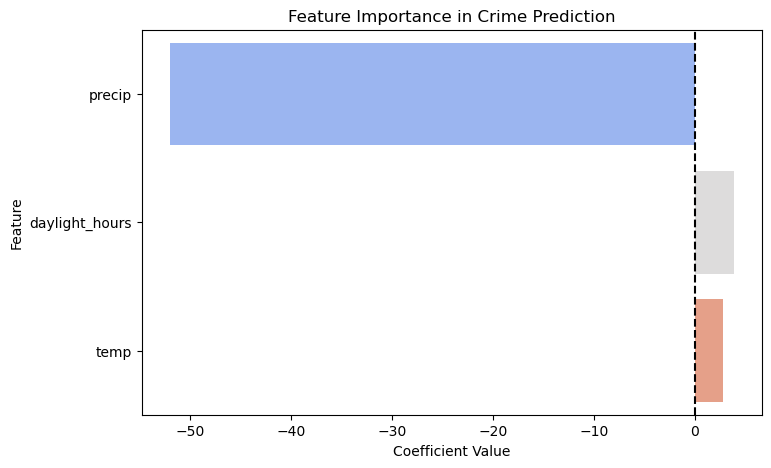

In [76]:
# Extract feature importance (coefficients)
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lr_model.coef_.flatten()})

# Sort by absolute value of coefficient
feature_importance = feature_importance.reindex(feature_importance['Coefficient'].abs().sort_values(ascending=False).index)

# Plot feature importance to show which weather conditions influence crime the most
plt.figure(figsize=(8, 5))
sns.barplot(x="Coefficient", y="Feature", data=feature_importance, palette="coolwarm")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance in Crime Prediction")
plt.axvline(0, color="black", linestyle="--")  # Reference line at 0
plt.show()


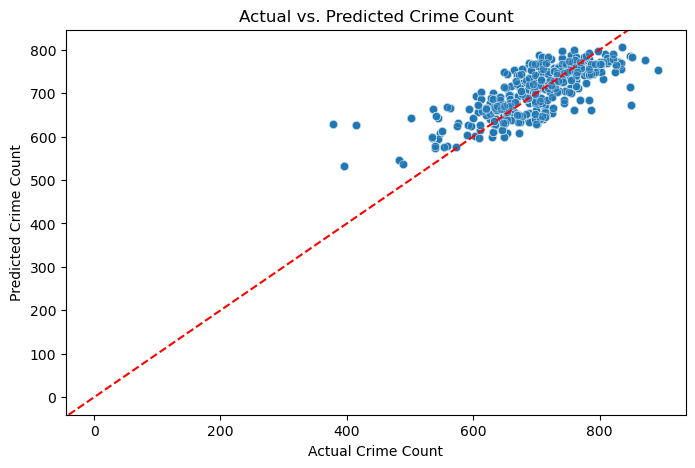

In [77]:
# Predict crime count on test set
y_pred = lr_model.predict(X_test)

# Make a scatter plot to show how well the model is predicting crime counts
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Crime Count")
plt.ylabel("Predicted Crime Count")
plt.title("Actual vs. Predicted Crime Count")
plt.axline((0, 0), slope=1, color="red", linestyle="--")  # Ideal fit line
plt.show()


### Conclusion

From our analysis, we observed that certain neighborhoods consistently experience higher crime rates, emphasizing the need for increased community policing and targeted safety initiatives in these areas. Crime patterns notably fluctuate depending on the time of day and year, peaking during weekdays, summer months, and late-night hours. Common crimes in residential areas include battery, theft, and property-related offenses.

We also identified a significant relationship between income levels and crime rates; neighborhoods with higher average incomes typically have lower crime rates. Additionally, weather conditions play a notable role in crime trends: rainy or snowy weather tends to reduce criminal activity, while warmer temperatures and extended daylight hours contribute to higher crime rates.

Based on these insights, residents are encouraged to remain particularly cautious during identified high-risk periods—such as weekdays, summer months, and late-night hours—and actively engage in neighborhood watch and other community safety programs. Simple precautions and staying informed can substantially mitigate personal risk.

For police officers, we recommend reallocating resources strategically by increasing patrols and visibility in higher-risk neighborhoods and during peak crime periods. Additionally, integrating weather forecasts into patrol planning can enhance proactive responses to crime fluctuations.

By collaboratively applying these data-driven recommendations, residents and law enforcement can effectively promote community safety and significantly improve the overall quality of life.